<a href="https://colab.research.google.com/github/wilferalexander/-robot_trading-/blob/main/BootBitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BootBitcoin


# 1. Configuración del ambiente

Para empezar, puedes utilizar un entorno virtual como Google Colaboratory, o si deseas, puedes usar el editor Python de tu preferencia, sólo asegúrate de tener Python 3.x instalado en tu computadora.

En el proyecto usaremos 5 variables que serán manipuladas dentro de varias funciones, estas variables son conocidas como variables globales, es necesario que las definas aquí de la siguiente forma:

global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

También necesitarás instalar algunas librerías de Python que son esenciales para este proyecto, como Pandas, Numpy, Matplotlib, etc.

Para estar seguros de que tenemos todo listo en nuestro Ambiente, podemos ejecutar las siguientes líneas de código:

!python -V
!pip show Pandas | grep 'Name\|Version'
!pip show Numpy | grep 'Name\|Version'
!pip show Matplotlib | grep 'Name\|Version'

El resultado debería ser las bibliotecas y sus versiones que tenemos instaladas en nuestro Ambiente, si tienes algún error revisa tu configuración, talvez falte instalar alguna biblioteca.

In [1]:
# Validamos que las liberias que necesitamos esten disponibles y no tengamos errores en nuestro ambiente
!python -V
!pip show Pandas | grep 'Name\|Version'
!pip show Numpy | grep 'Name\|Version'
!pip show Numpy | grep 'Name\|Version'

Python 3.10.12
Name: pandas
Version: 1.5.3
Name: numpy
Version: 1.23.5
Name: numpy
Version: 1.23.5


In [2]:
# Definir variables globales
global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
df_bitcoin = None
precio_actual = 0
tendencia = ""
media_bitcoin = 0.0
algoritmo_decision = ""

# Obtención de datos

Crea una funcion importar_base_bitcoin(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Utiliza la biblioteca yfinance de Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, deberás extraer el histórico de los últimos 7 días en intervalos de 5 minutos, este histórico deberás guardarlo en el dataframe df_bitcoin.
Crea una funcion extraer_tendencias(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Utilizando la biblioteca BeautifulSoup deberás realizar Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h % . El precio deberás convertirlo a float y guardarlo en la variable llamada precio_actual. Ahora, en la variable tendencia guarda el valor de 'baja'si la variación del precio es negativa, sino, guarda el valor de 'alta'.
Apoyo
Puedes encontrar más información de como instalar y usar la biblioteca yfinance en su página oficial: yfinance.
Además de los recursos mencionados en el card ‘Para saber más’ del Trello, puedes encontrar información complementar de Web Scraping en el siguiente enlace: Web Scraping con Python: Cómo Extraer Datos de Sitios Web.



Para extraer el histórico de precios del Bitcoin en dólares (BTC-USD) en intervalos de 5 minutos durante los últimos 7 días utilizando la biblioteca yfinance, puedes hacer lo siguiente:

Asegúrate de que tienes yfinance instalado en tu entorno de Python. Puedes instalarlo usando pip si aún no lo tienes

In [3]:
pip install yfinance

Ahora vamos  guardar la informacion en el historico en el dataframe df_bitcoin


In [5]:
#Importamos las librerias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pytz

Este código creará un DataFrame llamado df_bitcoin con el histórico de precios del Bitcoin en intervalos de 5 minutos para los últimos 30 días.

En este ejemplo, la función extraer_tendencias utiliza global para acceder y modificar las variables globales definidas al comienzo del script. La función extrae datos históricos, calcula el precio actual, la tendencia, la media del Bitcoin y el algoritmo de decisión, y los almacena en las variables globales. Luego, se imprimen las variables globales para verificar los resultados.

In [9]:
def importar_base_bitcoin():
    global df_bitcoin

    # Símbolo de Bitcoin en yfinance
    simbolo_bitcoin = "BTC-USD"

    # Descargar datos de Bitcoin utilizando yfinance
    df_bitcoin = yf.download(simbolo_bitcoin, period="7d", interval="5m")



# Llamar a la función para importar los datos de Bitcoin
importar_base_bitcoin()
df_bitcoin


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-21 00:00:00+00:00,29683.380859,29688.470703,29677.050781,29677.050781,29677.050781,0
2023-10-21 00:05:00+00:00,29685.591797,29697.873047,29685.591797,29697.873047,29697.873047,0
2023-10-21 00:10:00+00:00,29694.681641,29694.681641,29678.056641,29678.056641,29678.056641,0
2023-10-21 00:15:00+00:00,29679.595703,29701.451172,29679.595703,29687.312500,29687.312500,0
2023-10-21 00:20:00+00:00,29681.755859,29683.751953,29673.628906,29682.761719,29682.761719,606208
...,...,...,...,...,...,...
2023-10-27 17:00:00+00:00,33872.898438,33875.968750,33855.484375,33855.484375,33855.484375,0
2023-10-27 17:05:00+00:00,33849.664062,33849.664062,33517.152344,33612.886719,33612.886719,161170432
2023-10-27 17:10:00+00:00,33652.511719,33699.878906,33623.347656,33699.878906,33699.878906,718720000


In [10]:
def extraer_tendencias():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

    # Crear un objeto de la clase Ticker para BTC-USD
    bitcoin = yf.Ticker("BTC-USD")

    # Obtener el histórico de precios de los últimos 7 días en intervalos de 5 minutos
    df_bitcoin = bitcoin.history(period="7d", interval="5m")

    # Calcular el precio actual como el último precio en el DataFrame
    precio_actual = df_bitcoin['Close'].iloc[-1]

    # Calcular la media del precio de cierre
    media_bitcoin = df_bitcoin['Close'].mean()

    # Establecer una tendencia simple basada en la comparación de precios
    if precio_actual > media_bitcoin:
        tendencia = "Alcista"
    else:
        tendencia = "Bajista"

    # Definir un algoritmo de decisión
    if precio_actual > media_bitcoin:
        algoritmo_decision = "Decision1"
    else:
        algoritmo_decision = "Decision2"

# Llama a la función para extraer las tendencias
extraer_tendencias()

# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)


Precio Actual: 33693.171875
Tendencia: Alcista
Media Bitcoin: 32417.308620253785
Algoritmo de Decisión: Decision1


In [11]:
df_bitcoin.head()
# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)

Precio Actual: 33693.171875
Tendencia: Alcista
Media Bitcoin: 32417.308620253785
Algoritmo de Decisión: Decision1


In [12]:
df_bitcoin.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1916.000000,1916.000000,1916.000000,1916.000000,1.916000e+03,1916.0,1916.0
mean,32415.292852,32438.119847,32393.743557,32417.308620,3.378475e+07,0.0,0.0
std,2055.897357,2062.523759,2047.969247,2055.702193,1.221296e+08,0.0,0.0
min,29486.984375,29488.609375,29481.751953,29483.230469,0.000000e+00,0.0,0.0
25%,29983.729004,30000.395020,29975.441895,29985.948730,0.000000e+00,0.0,0.0
50%,33850.707031,33878.394531,33825.406250,33853.453125,0.000000e+00,0.0,0.0
75%,34177.682617,34198.865234,34157.489258,34184.836914,2.733670e+07,0.0,0.0
max,35116.218750,35150.433594,34950.511719,35044.105469,3.556581e+09,0.0,0.0


# Web scraping

Para realizar web scraping en la página https://coinmarketcap.com/ y extraer el precio actual del Bitcoin en dólares (USD) y la variación de su precio en la última hora (1h %), necesitamos utilizar la biblioteca BeautifulSoup junto con la biblioteca requests.

In [13]:
#Instalo la bilioteca beautifulsoup4
!pip install beautifulsoup4 requests

creamos un script que realice el web scraping de la siguiente manera:

Este script realiza una solicitud GET a la página de CoinMarketCap, utiliza
BeautifulSoup para analizar el HTML y extrae el precio actual del Bitcoin en USD, así como la variación en la última hora. Luego, determina si la tendencia es "alta" o "baja" en función del cambio en la última hora. Por último, muestra el precio actual y la tendencia.

In [14]:
import requests
from bs4 import BeautifulSoup

# Definir variables globales
global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
#df_bitcoin = None
#precio_actual = 0
##tendencia = ""
#media_bitcoin = 0.0
#algoritmo_decision = ""

def limpieza_datos():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

    # URL de la página de CoinMarketCap
    url = "https://coinmarketcap.com/"

    # Realizar una solicitud GET a la URL
    response = requests.get(url)

    # Comprobar si la solicitud fue exitosa
    if response.status_code == 200:
        # Parsear el contenido de la página con BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")

        # Buscar el elemento que contiene el precio actual del Bitcoin en USD
        bitcoin_price_element = soup.find("div", class_="sc-a0353bbc-0 gDrtaY")

        # Verificar si se encontró el elemento
        if bitcoin_price_element:
            # Extraer el precio actual en USD como un texto
            precio_actual_text = bitcoin_price_element.text.strip()

            # Limpiar el texto para eliminar caracteres no deseados
            precio_actual_text = precio_actual_text.replace("$", "").replace(",", "").strip()

            # Verificar si el texto no está vacío
            if precio_actual_text:
                # Convertir el precio a un número de punto flotante (float)
                precio_actual = float(precio_actual_text)
            else:
                print("No se pudo extraer el precio actual del Bitcoin.")
        else:
            print("No se pudo encontrar el elemento del precio actual del Bitcoin.")

        # Buscar el elemento que contiene la variación del precio en la última hora (1h %)
        bitcoin_1h_change_element = soup.find("span", class_="sc-e2bf8e45-2 eWItEG")

        # Extraer el cambio en la última hora como un texto
        cambio_1h_text = bitcoin_1h_change_element.text

        # Determinar la tendencia (alta o baja) en función del cambio en la última hora
        if cambio_1h_text.startswith('-'):
            tendencia = "baja"
        else:
            tendencia = "alta"
    else:
        print("No se pudo acceder a la página de CoinMarketCap.")

# Llama a la función para actualizar los datos
limpieza_datos()

# Imprime las variables globales actualizadas
print("Precio Actual del Bitcoin (USD):", precio_actual)
print("Tendencia en la Última Hora:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)


Precio Actual del Bitcoin (USD): 33710.38
Tendencia en la Última Hora: alta
Media Bitcoin: 32417.308620253785
Algoritmo de Decisión: Decision1


# Limpieza de Datos Y exploracion de datos



En este ejemplo, primero se crea un DataFrame df_bitcoin con algunos datos de ejemplo. Luego, se utiliza el método copy() para crear una copia independiente en el DataFrame df_bitcoin_limpio

<Axes: >

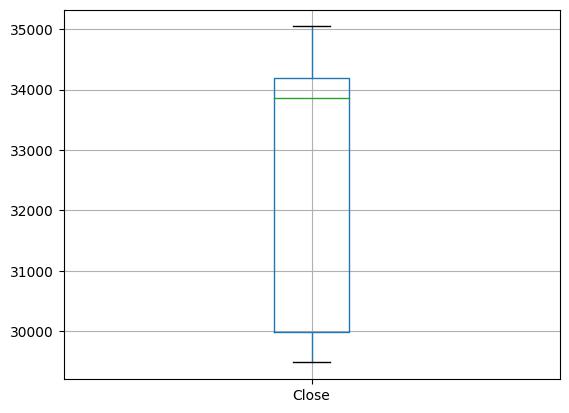

In [25]:
#Datos sin tratar
df_bitcoin.boxplot(['Close'])

In [26]:
# Crear una copia del DataFrame df_bitcoin en df_bitcoin_limpio
df_bitcoin_limpio = df_bitcoin.copy()
# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)


Precio Actual: 33710.38
Tendencia: alta
Media Bitcoin: 32417.308620253785
Algoritmo de Decisión: Decision1


In [28]:
#Metodo describe
df_bitcoin_limpio.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1916.000000,1916.000000,1916.000000,1916.000000,1.916000e+03,1916.0,1916.0
mean,32415.292852,32438.119847,32393.743557,32417.308620,3.378475e+07,0.0,0.0
std,2055.897357,2062.523759,2047.969247,2055.702193,1.221296e+08,0.0,0.0
min,29486.984375,29488.609375,29481.751953,29483.230469,0.000000e+00,0.0,0.0
25%,29983.729004,30000.395020,29975.441895,29985.948730,0.000000e+00,0.0,0.0
50%,33850.707031,33878.394531,33825.406250,33853.453125,0.000000e+00,0.0,0.0
75%,34177.682617,34198.865234,34157.489258,34184.836914,2.733670e+07,0.0,0.0
max,35116.218750,35150.433594,34950.511719,35044.105469,3.556581e+09,0.0,0.0


In [29]:
df_bitcoin_limpio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1916 entries, 2023-10-21 00:00:00+00:00 to 2023-10-27 17:20:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1916 non-null   float64
 1   High          1916 non-null   float64
 2   Low           1916 non-null   float64
 3   Close         1916 non-null   float64
 4   Volume        1916 non-null   int64  
 5   Dividends     1916 non-null   float64
 6   Stock Splits  1916 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 119.8 KB


In [30]:
df_bitcoin_limpio.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [31]:
df_bitcoin_limpio.shape

(1916, 7)

In [ ]:
df_bitcoin_limpio.shape[0]
df_bitcoin_limpio.shape[1]

print('La base de datos presenta {} registros  y {} columnas'.format(df_bitcoin_limpio.shape[0],df_bitcoin_limpio.shape[1]))

La base de datos presenta 1890 registros  y 7 columnas


El código utiliza la función duplicated en el índice del DataFrame para identificar duplicados y luego usa la negación ~ para seleccionar solo las filas que no están duplicadas, conservando la primera ocurrencia de cada duplicado. El resultado es un DataFrame con índices únicos.

In [32]:
# Identificar duplicados en el índice y eliminarlos
df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]

# En este punto, df_bitcoin_limpio contiene solo índices únicos

# Mostrar el DataFrame resultante
df_bitcoin_limpio.head()
# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)

Precio Actual: 33710.38
Tendencia: alta
Media Bitcoin: 32417.308620253785
Algoritmo de Decisión: Decision1


primero se usa df_bitcoin_limpio['Close'].isnull() para identificar las filas que tienen valores nulos en la columna "Close." Luego, se trata el valor nulo (en este caso, se reemplaza por la media de la columna) utilizando fillna.

In [33]:
# Buscar valores nulos en la columna "Close"
valores_nulos = df_bitcoin_limpio[df_bitcoin_limpio['Close'].isnull()]

# Tratar los valores nulos (por ejemplo, reemplazarlos por un valor específico, eliminar las filas, etc.)
# En este ejemplo, reemplazamos los valores nulos por la media de la columna "Close"
media_close = df_bitcoin_limpio['Close'].mean()
df_bitcoin_limpio['Close'].fillna(media_close, inplace=True)

# Mostrar el DataFrame resultante después de tratar los valores nulos
df_bitcoin_limpio.head()
# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)


Precio Actual: 33710.38
Tendencia: alta
Media Bitcoin: 32417.308620253785
Algoritmo de Decisión: Decision1


En este ejemplo, primero se verifica qué registros tienen un volumen de transacción igual o menor a 0 utilizando df_bitcoin_limpio['Volume'] <= 0. Luego, se obtienen los índices de estos registros y se eliminan utilizando drop.

In [35]:
# Verificar registros con Volumen menor o igual a 0
indices_a_eliminar = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] <= 0].index

# Eliminar los registros con Volumen menor o igual a 0
df_bitcoin_limpio.drop(indices_a_eliminar, inplace=True)

# Mostrar el DataFrame resultante después de eliminar los registros
df_bitcoin_limpio.head()
# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)

Precio Actual: 33710.38
Tendencia: alta
Media Bitcoin: 32417.308620253785
Algoritmo de Decisión: Decision1


En este código, primero se crea un gráfico de caja para visualizar los outliers en la columna "Close." Luego, se utiliza el rango intercuartílico (IQR) para definir un umbral que determina los valores atípicos. Los registros que caen fuera de este umbral se consideran outliers y se eliminan del DataFrame

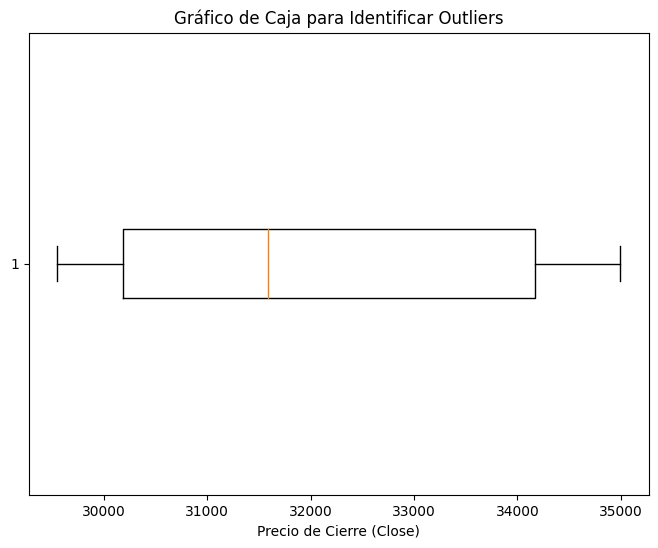

Precio Actual: 33710.38
Tendencia: alta
Media Bitcoin: 32417.308620253785
Algoritmo de Decisión: Decision1


In [36]:
# Crear un gráfico de caja (boxplot) para visualizar los outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(df_bitcoin_limpio['Close'], vert=False)
plt.title("Gráfico de Caja para Identificar Outliers")
plt.xlabel("Precio de Cierre (Close)")
plt.show()

# Identificar los valores atípicos (outliers) utilizando un criterio, por ejemplo, el rango intercuartílico (IQR)
Q1 = df_bitcoin_limpio['Close'].quantile(0.25)
Q3 = df_bitcoin_limpio['Close'].quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral para considerar los valores atípicos
umbral_superior = Q3 + 1.5 * IQR
umbral_inferior = Q1 - 1.5 * IQR

# Filtrar los registros que no son outliers
df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= umbral_inferior) & (df_bitcoin_limpio['Close'] <= umbral_superior)]

# Mostrar el DataFrame resultante después de eliminar los outliers
df_bitcoin_limpio.head()
# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)

En este código, primero se calculan los valores de Q1, Q3 y el IQR. Luego, se definen los límites del intervalo que deseas mantener, que son Q1 - 1.5 * IQR para el límite inferior y Q3 + 1.5 * IQR para el límite superior. Finalmente, se filtran los registros que caen dentro de este intervalo y se almacenan en un nuevo DataFrame llamado df_filtrado. Este DataFrame contendrá solo los registros cuyos precios estén entre Q1 y Q3, excluyendo los valores atípicos.

In [37]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_bitcoin_limpio['Close'].quantile(0.25)
Q3 = df_bitcoin_limpio['Close'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para el intervalo de valores que deseas mantener
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que se encuentran dentro del intervalo
df_filtrado = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= limite_inferior) & (df_bitcoin_limpio['Close'] <= limite_superior)]

# Mostrar el DataFrame resultante con los registros dentro del intervalo
df_filtrado.head()
# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)

Precio Actual: 33710.38
Tendencia: alta
Media Bitcoin: 32417.308620253785
Algoritmo de Decisión: Decision1


Con estos pasos, calculamos el precio promedio de los registros que cumplen con los criterios establecidos y almacenamos el resultado en la variable media_bitcoin. Luego, mostramos la media calculada.

In [38]:
# Calcular el precio promedio (Close) de la selección
media_bitcoin = df_filtrado['Close'].mean()

# Mostrar la media del precio de Bitcoin
print("Precio Promedio del Bitcoin (Close):", media_bitcoin)

# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)

Precio Promedio del Bitcoin (Close): 32226.238630022322
Precio Actual: 33710.38
Tendencia: alta
Media Bitcoin: 32226.238630022322
Algoritmo de Decisión: Decision1


# Tomar decisiones

En esta función, primero se definen las variables globales que se utilizarán (precio_actual, tendencia, media_bitcoin, algoritmo_decision). Luego, se aplican las condiciones especificadas en los criterios de decisión y se asigna el resultado a la variable algoritmo_decision. Finalmente, se muestra la decisión tomada.

Asegúrate de llamar a esta función en tu código principal para tomar decisiones basadas en los valores actuales y la tendencia.

In [39]:
def tomar_decisiones():
    global precio_actual, tendencia, media_bitcoin, algoritmo_decision

    if precio_actual >= media_bitcoin and tendencia == "baja":
        algoritmo_decision = "Vender"
    elif precio_actual < media_bitcoin and tendencia == "alta":
        algoritmo_decision = "Comprar"
    else:
        algoritmo_decision = "Esperar"

# Llama a la función para tomar decisiones
tomar_decisiones()

# Muestra la decisión tomada
print("Decisión Tomada:", algoritmo_decision)

# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)

Decisión Tomada: Esperar
Precio Actual: 33710.38
Tendencia: alta
Media Bitcoin: 32226.238630022322
Algoritmo de Decisión: Esperar


En este código, primero se agrega la columna "Promedio" al DataFrame original df_bitcoin. Luego, en la función visualizacion(), se configura el tamaño del gráfico, se agrega un título, se dibujan las líneas del precio de cierre y el promedio, se muestra la decisión del algoritmo en el gráfico y se muestra el gráfico en pantalla.

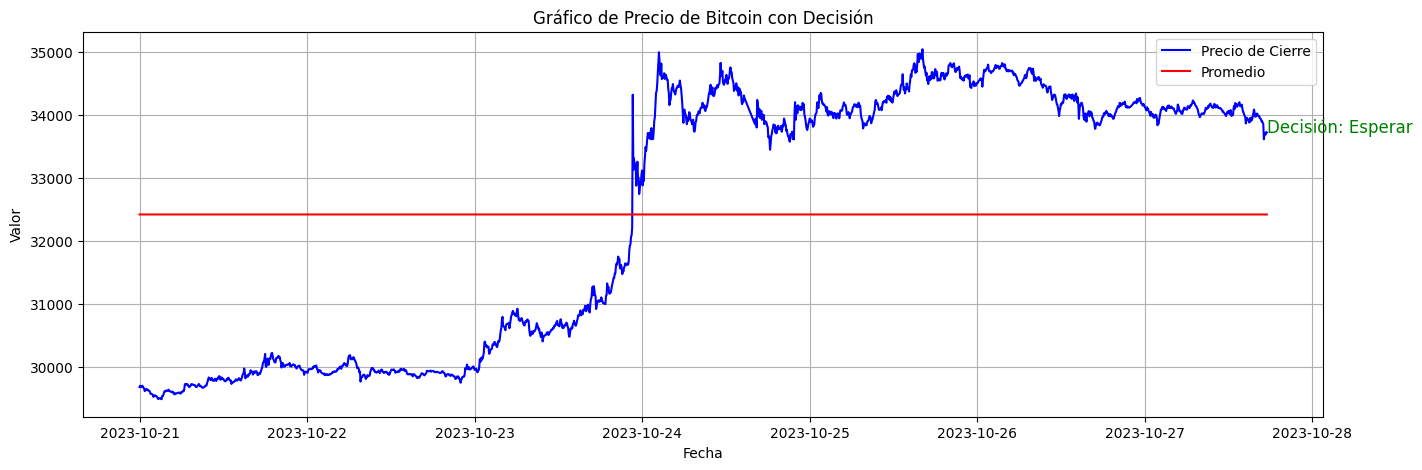

Precio Actual: 33721.3
Tendencia: alta
Media Bitcoin: 32418.66902983251
Algoritmo de Decisión: Esperar


In [52]:
def visualizacion():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

    # Agregar la columna "Promedio" al DataFrame original
    df_bitcoin['Promedio'] = media_bitcoin

    # Configurar el tamaño del gráfico
    plt.figure(figsize=(16, 5))

    # Agregar un título al gráfico
    plt.title("Gráfico de Precio de Bitcoin con Decisión")

    # Dibujar una línea con los datos del índice y la columna "Close"
    plt.plot(df_bitcoin.index, df_bitcoin['Close'], label='Precio de Cierre', color='blue')

    # Dibujar una línea con los datos del índice y la columna "Promedio"
    plt.plot(df_bitcoin.index, df_bitcoin['Promedio'], label='Promedio', color='red', linestyle='-')

    # Mostrar la decisión del algoritmo en el gráfico
    plt.annotate(f'Decisión: {algoritmo_decision}', xy=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]), fontsize=12, color='green')


    # Configurar etiquetas en el eje x
    plt.xticks(rotation=360)

    # Agregar leyenda al gráfico
    plt.legend()

    # Mostrar el gráfico
    # Muestra en pantalla el gráfico configurado
    plt.xlabel('Fecha')  # Etiqueta del eje x
    plt.ylabel('Valor')  # Etiqueta del eje y
    plt.grid(True)  # Mostrar cuadrícula
    plt.show()

# Llamar a la función para mostrar el gráfico
visualizacion()

# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)


In [ ]:
df_bitcoin.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Promedio
Datetime,,,,,,,,
2023-10-17 00:00:00+00:00,28522.097656,28540.667969,28514.380859,28540.667969,0,0.0,0.0,29314.249181
2023-10-17 00:05:00+00:00,28546.552734,28559.431641,28512.556641,28512.556641,24692736,0.0,0.0,29314.249181
2023-10-17 00:10:00+00:00,28512.556641,28512.556641,28499.109375,28499.109375,20992000,0.0,0.0,29314.249181
2023-10-17 00:15:00+00:00,28484.177734,28484.177734,28463.269531,28463.269531,0,0.0,0.0,29314.249181
2023-10-17 00:20:00+00:00,28465.617188,28472.287109,28465.617188,28472.287109,14622720,0.0,0.0,29314.249181


# **Automatizacion**

El método clear_output y la biblioteca time son útiles para limpiar la salida y controlar la frecuencia de actualización de los gráficos

In [48]:
from IPython.display import clear_output
import time

[*********************100%%**********************]  1 of 1 completed
Precio Actual: 33618.97
Tendencia: alta
Media Bitcoin: 32422.490232344724
Algoritmo de Decisión: Esperar


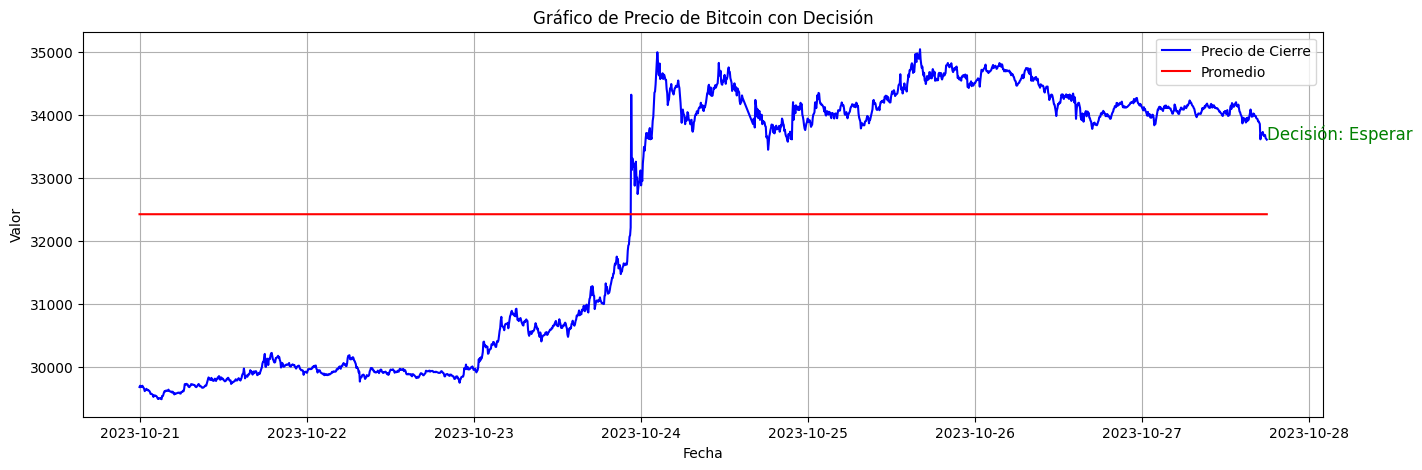

In [ ]:
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  # Imprime las variables globales
  print("Precio Actual:", precio_actual)
  print("Tendencia:", tendencia)
  print("Media Bitcoin:", media_bitcoin)
  print("Algoritmo de Decisión:", algoritmo_decision)
  visualizacion()
  time.sleep(300)
